In [1]:
import pandas as pd

data = pd.read_csv('prcp_monthly.csv')
data['month'] = pd.to_datetime(data['month'])
data.head()

,index,month,prcp
0,0,2001-01-01,101.400000
1,1,2001-02-01,98.200000
2,2,2001-03-01,201.200000
3,3,2001-04-01,141.200000
4,4,2001-05-01,29.233333


### 1. Check for stationary:

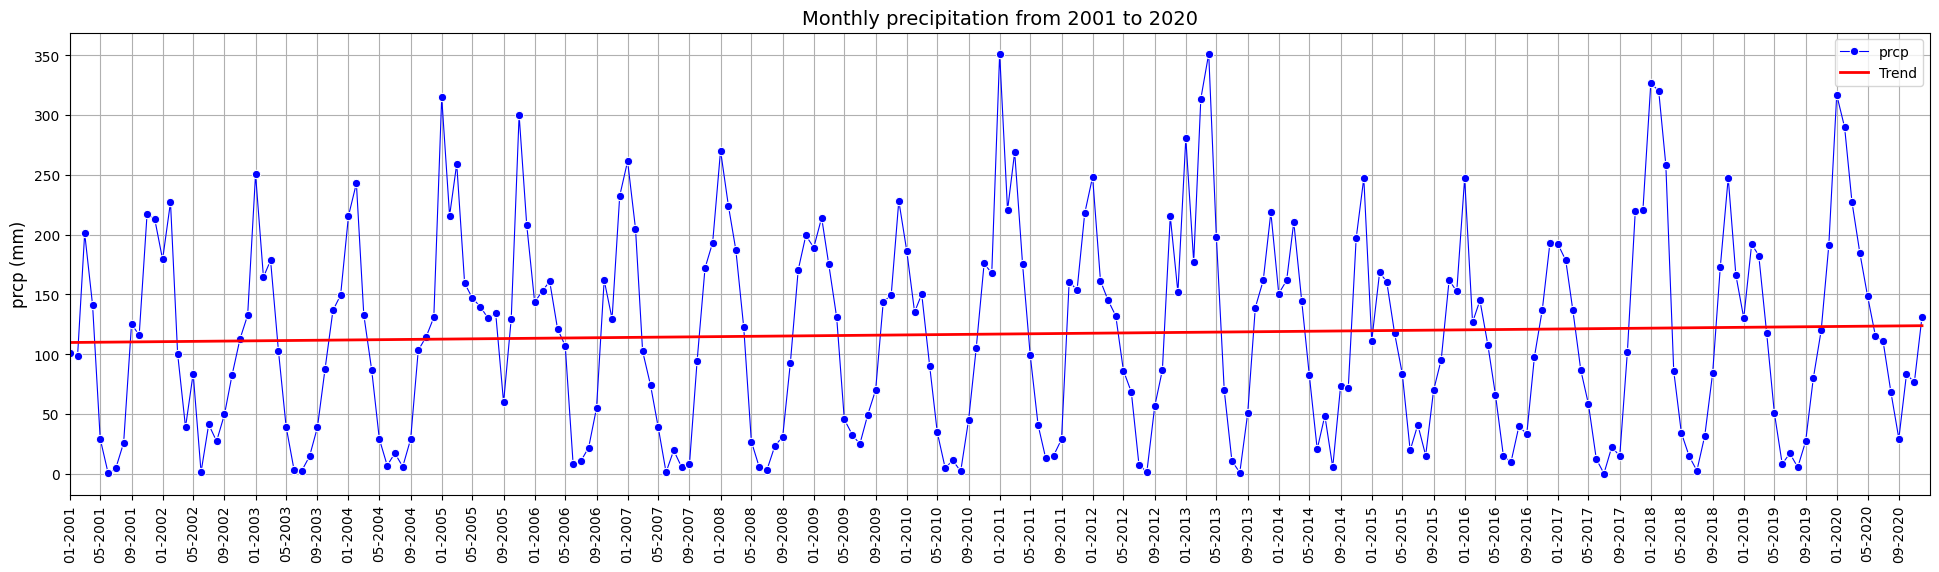

In [2]:
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime
import numpy as np

model = LinearRegression()

X = data[['index']].values
y = data['prcp'].values
model.fit(X, y)
data['trend'] = model.predict(X)

plt.figure(figsize=(24, 6))
sns.lineplot(x=data["month"], y=data["prcp"], label="prcp", color="b", linewidth=0.8, marker='o')
plt.plot(data['month'], data['trend'], color='red', linewidth=2, label='Trend')
plt.xlim(pd.to_datetime("2001-01-01"), pd.to_datetime("2020-12-31"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=4)) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
plt.xticks(rotation=90)  
plt.title("Monthly precipitation from 2001 to 2020", fontsize=14)
plt.xlabel(None)
plt.ylabel("prcp (mm)", fontsize=12)
plt.grid(True)
plt.legend()

 - There is no consistent trend (upward or downward) over the entire time span. The series appears to slowly wander up and down.
 - There are no obvious outliers.

#### Check randomness using Lag Plot:

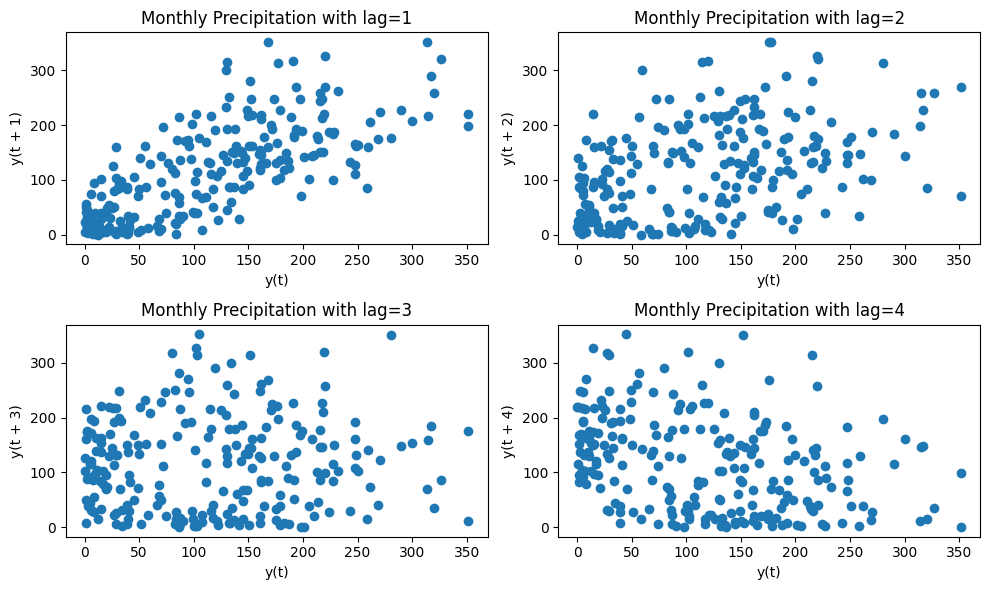

In [4]:
from pandas.plotting import lag_plot
import matplotlib.pyplot as plt   

plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
lag_plot(data['prcp'], lag=1)
plt.title('Monthly Precipitation with lag=1')

plt.subplot(2, 2, 2)
lag_plot(data['prcp'], lag=2)
plt.title('Monthly Precipitation with lag=2')

plt.subplot(2, 2, 3)
lag_plot(data['prcp'], lag=3)
plt.title('Monthly Precipitation with lag=3')

plt.subplot(2, 2, 4)
lag_plot(data['prcp'], lag=4)
plt.title('Monthly Precipitation with lag=4')

plt.tight_layout()
plt.show()

Check randomness using Autocorrelation:

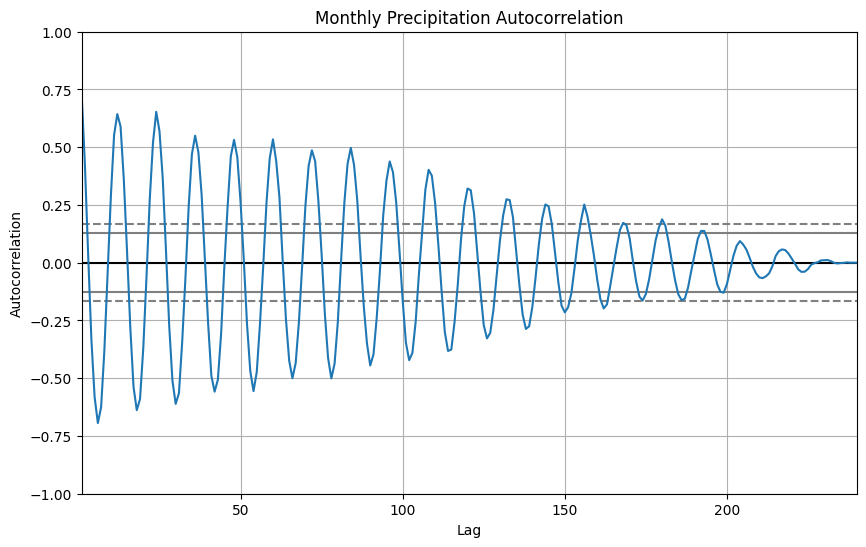

In [5]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10,6))
autocorrelation_plot(data['prcp'])
plt.title('Monthly Precipitation Autocorrelation')
plt.show()

ADF test:

In [11]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    print('H0: Non-stationary series')
    print('H1: Stationary series\n')
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}\n")
    if result[1] < 0.05:
        print('p-value < 0.05')
        print("-> Stationary series (Reject H₀)")
    else:
        print('p-value > 0.05')
        print(" -> Non-stationary series (Fail to Reject H₀)")

adf_test(data['prcp'])

H0: Non-stationary series
H1: Stationary series

ADF Statistic: -3.864520289962589
p-value: 0.002312041872555403

p-value < 0.05
-> Stationary series (Reject H₀)


KPPS test:

In [25]:
from statsmodels.tsa.stattools import kpss

def kpss_test(series):
    print('H0: Stationary series')
    print('H1: Non-stationary series\n')
    result = kpss(series, regression='c', nlags='auto')
    print(f"KPSS Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] < 0.05:
        print("-> Non-stationary series (Reject H₀)")
    else:
        print("-> Stationary series (Fail to Reject H₀)")

kpss_test(data['prcp'])


H0: Stationary series
H1: Non-stationary series

KPSS Statistic: 0.054343197162415535
p-value: 0.1
-> Stationary series (Fail to Reject H₀)


/tmp/ipykernel_1746/1923183154.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c', nlags='auto')
